# EJERCICIOS

In [210]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,confusion_matrix
from sklearn.svm import SVC 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score, roc_auc_score
from scipy.stats import reciprocal
from sklearn.feature_extraction.text import TfidfVectorizer


## EJERCICIO 1

Vamos a trabajar con el siguiente conjunto de datos: https://www.datacamp.com/es/datalab/datasets/dataset-python-loans

| Variable      	| Explicación                                                                                                             |
|-------------------|-------------------------------------------------------------------------------------------------------------------------|
| credit_policy	    | 1 si el cliente cumple con los criterios de suscripción de crédito; 0 en caso contrario.                                |
| purpose	        | El propósito del préstamo.                                                                                              |
| int_rate	        | La tasa de interés del préstamo (a los prestatarios más riesgosos se les asignan tasas más altas).                      |
| installment	    | Las cuotas mensuales del prestamo                                                                                       |
| log_annual_inc    | El logaritmo natural del ingreso anual declarado por el prestatario.                                                    |
| dti	            | La relación deuda-ingreso del prestatario (monto de deuda dividido por ingresos anuales).                               |
| fico	            | El puntaje de crédito FICO del prestatario.                                                                             |
| days_with_cr_line	| El número de días que el prestatario ha tenido una línea de crédito.                                                    |
| revol_bal	        | El saldo rotativo del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta).                    |
| revol_util        | La tasa de utilización de la línea de crédito del prestatario (monto de crédito utilizado respecto al total disponible).|
| inq_last_6mths	| El número de consultas de los acreedores al prestatario en los últimos 6 meses.                                         |
| delinq_2yrs	    | El número de veces que el prestatario ha estado más de 30 días en mora en un pago en los últimos 2 años.                |
| pub_rec	        | El número de registros públicos despectivos del prestatario.                                                            |
| not_fully_paid    | 1 si el préstamo se pagó totalmente; 0 en caso contrario.                                                        |

El csv lo tienes disponible en Moodle

Este conjunto de datos consta de más de 9500 préstamos con información sobre los datos del préstamo y si el préstamo fue pagado en su totalidad o no. Estos datos fueron extraídos de LendingClub.com
Crea un clasificador para predecir si un prestamo va a ser pagado o no.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [211]:
loan_data = pd.read_csv("Datos/loan_data.csv")

#### EXPLORAR LOS DATOS

Entre otras cosas: estadísticas, matriz de correlaciones y borrar columnas innecesarias.

In [212]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [213]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [214]:
loan_data.describe(include='object')

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


In [215]:
loan_data["purpose"].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [216]:
corr_matrix = loan_data.corr(numeric_only=True).abs()
target_corr=corr_matrix['not.fully.paid'].sort_values(ascending=False)
target_corr

not.fully.paid       1.000000
int.rate             0.159552
credit.policy        0.158119
fico                 0.149666
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
log.annual.inc       0.033439
days.with.cr.line    0.029237
delinq.2yrs          0.008881
Name: not.fully.paid, dtype: float64

In [217]:
corr_matrix.style.background_gradient()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.294089,0.058770,0.034906,0.090901,0.348319,0.099026,0.187518,0.104095,0.535511,0.076318,0.054243,0.158119
int.rate,0.294089,1.000000,0.276140,0.056383,0.220006,0.714821,0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,0.010419,0.004368,0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,0.033439
dti,0.090901,0.220006,0.050202,0.054065,1.000000,0.241191,0.060101,0.188748,0.337109,0.029189,0.021792,0.006209,0.037362
fico,0.348319,0.714821,0.086039,0.114576,0.241191,1.000000,0.263880,0.015553,0.541289,0.185293,0.216340,0.147592,0.149666
days.with.cr.line,0.099026,0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,0.024239,0.041736,0.081374,0.071826,0.029237
revol.bal,0.187518,0.092527,0.233625,0.372140,0.188748,0.015553,0.229344,1.000000,0.203779,0.022394,0.033243,0.031010,0.053699
revol.util,0.104095,0.464837,0.081356,0.054881,0.337109,0.541289,0.024239,0.203779,1.000000,0.013880,0.042740,0.066717,0.082088
inq.last.6mths,0.535511,0.202780,0.010419,0.029171,0.029189,0.185293,0.041736,0.022394,0.013880,1.000000,0.021245,0.072673,0.149452


In [218]:
# Borramos los datos con una correlación muy baja
loan_data_copy=loan_data.copy()
a_borrar=target_corr[target_corr < 0.04].index.to_list()
loan_data_copy=loan_data_copy.drop(columns=a_borrar)
corr_matrix = loan_data_copy.corr(numeric_only=True).abs()
corr_matrix.style.background_gradient()

,credit.policy,int.rate,installment,fico,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid
credit.policy,1.000000,0.294089,0.058770,0.348319,0.187518,0.104095,0.535511,0.054243,0.158119
int.rate,0.294089,1.000000,0.276140,0.714821,0.092527,0.464837,0.202780,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.086039,0.233625,0.081356,0.010419,0.032760,0.049955
fico,0.348319,0.714821,0.086039,1.000000,0.015553,0.541289,0.185293,0.147592,0.149666
revol.bal,0.187518,0.092527,0.233625,0.015553,1.000000,0.203779,0.022394,0.031010,0.053699
revol.util,0.104095,0.464837,0.081356,0.541289,0.203779,1.000000,0.013880,0.066717,0.082088
inq.last.6mths,0.535511,0.202780,0.010419,0.185293,0.022394,0.013880,1.000000,0.072673,0.149452
pub.rec,0.054243,0.098162,0.032760,0.147592,0.031010,0.066717,0.072673,1.000000,0.048634
not.fully.paid,0.158119,0.159552,0.049955,0.149666,0.053699,0.082088,0.149452,0.048634,1.000000


<Figure size 640x480 with 0 Axes>

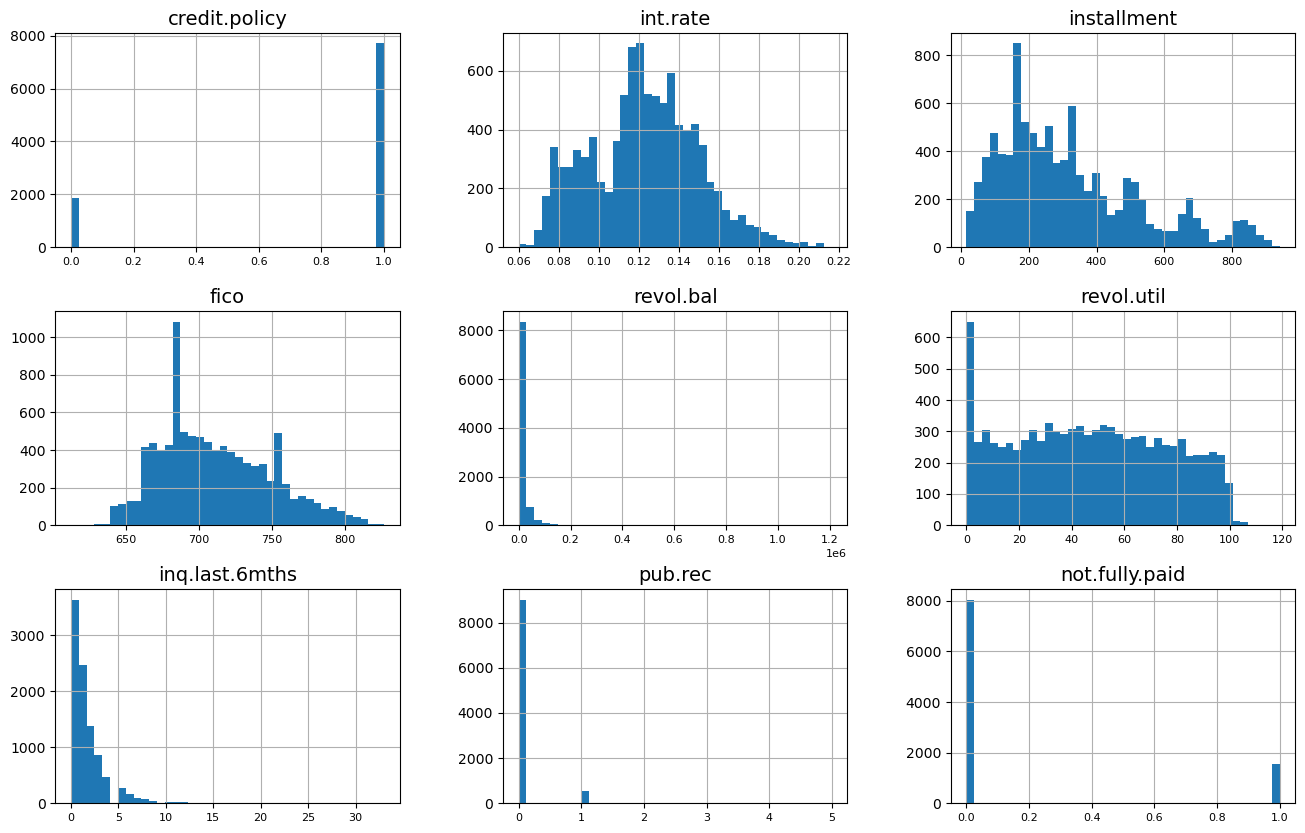

In [219]:
plt.tight_layout()
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)
loan_data_copy.hist(bins=40, figsize=(16, 10))
plt.show()

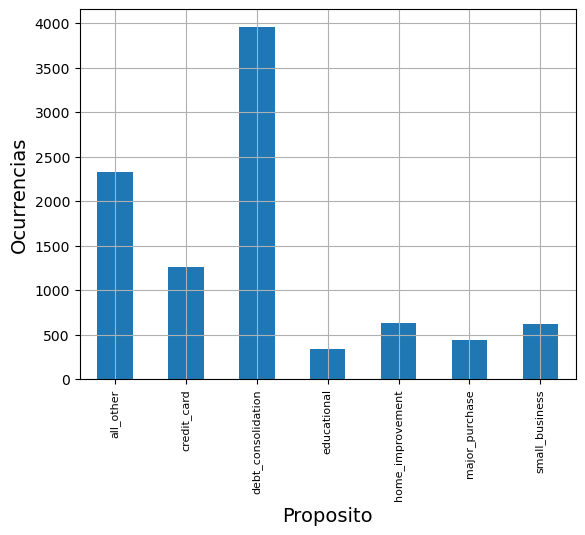

In [220]:
loan_data_copy["purpose"].value_counts().sort_index().plot.bar(rot=90, grid=True)
plt.xlabel("Proposito")
plt.ylabel("Ocurrencias")
plt.show()

<Axes: xlabel='purpose', ylabel='count'>

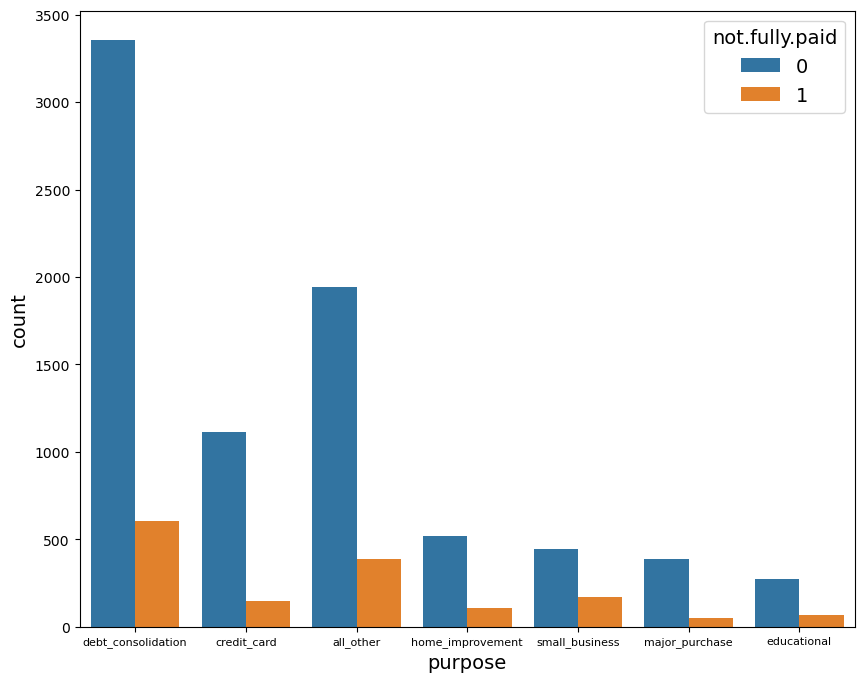

In [221]:
plt.figure(figsize=(10,8))
plt.tight_layout()
sns.countplot(loan_data_copy,x='purpose',legend=True,hue='not.fully.paid')

In [222]:
"""
Parece ser que la variable de proposito no afecta demasiado 
"""
print(loan_data_copy[['purpose', 'not.fully.paid']].groupby('purpose', as_index=False).mean())
print(loan_data_copy[['not.fully.paid']].mean())

              purpose  not.fully.paid
0           all_other        0.166023
1         credit_card        0.115689
2  debt_consolidation        0.152388
3         educational        0.201166
4    home_improvement        0.170111
5      major_purchase        0.112128
6      small_business        0.277868
not.fully.paid    0.160054
dtype: float64


#### DIVIDIR LOS DATOS

In [223]:
df_loan_train, df_loan_test = train_test_split(loan_data, test_size=0.15, random_state=17)
df_loan_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8141 entries, 843 to 2191
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      8141 non-null   int64  
 1   purpose            8141 non-null   object 
 2   int.rate           8141 non-null   float64
 3   installment        8141 non-null   float64
 4   log.annual.inc     8141 non-null   float64
 5   dti                8141 non-null   float64
 6   fico               8141 non-null   int64  
 7   days.with.cr.line  8141 non-null   float64
 8   revol.bal          8141 non-null   int64  
 9   revol.util         8141 non-null   float64
 10  inq.last.6mths     8141 non-null   int64  
 11  delinq.2yrs        8141 non-null   int64  
 12  pub.rec            8141 non-null   int64  
 13  not.fully.paid     8141 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 954.0+ KB


#### PREPARAR LOS DATOS

In [224]:

imputer_moda=SimpleImputer(strategy='most_frequent')
imputer_media=SimpleImputer(strategy='mean')

pipeline_media = make_pipeline(
    imputer_media,
    FunctionTransformer(np.sqrt, feature_names_out="one-to-one"),
    StandardScaler()
)
pipeline_moda = make_pipeline(
    imputer_moda,
    FunctionTransformer(np.sqrt, feature_names_out="one-to-one"),
    StandardScaler()
)

purpose_pipeline = make_pipeline(
    imputer_moda,
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)


#'dti', 'log.annual.inc', 'days.with.cr.line', 'delinq.2yrs'
transformar = ColumnTransformer([
        ("pipeline_media", pipeline_media, ["revol.util", "revol.bal", "installment", "int.rate"]),
        ("pipeline_moda", pipeline_moda, ["pub.rec", "inq.last.6mths", "fico", "credit.policy"]),
        ("purpose", purpose_pipeline, ["purpose"]),
        ("drop_columns", 'drop', ["dti", "log.annual.inc", "delinq.2yrs", "days.with.cr.line"])
    ], 
    remainder='passthrough',
    verbose_feature_names_out=False
)

pipeline=make_pipeline(transformar)

prep_array = pipeline.fit_transform(loan_data)

feature_names = pipeline.get_feature_names_out()

df_loan_adapt = pd.DataFrame(prep_array, columns=feature_names)

df_loan_adapt.head()

,revol.util,revol.bal,installment,int.rate,pub.rec,inq.last.6mths,fico,credit.policy,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,not.fully.paid
0,0.341989,0.845291,2.068832,-0.083624,-0.247147,-1.085294,0.699516,0.492222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.938342,1.021277,-0.314902,-0.537299,-0.247147,-1.085294,-0.088694,0.492222,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.493928,-0.596517,0.389855,0.525051,-0.247147,0.089698,-0.758405,0.492222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.860050,1.022840,-0.726905,-0.789782,-0.247147,0.089698,0.043819,0.492222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.019401,-0.471460,-1.179077,0.764050,-0.247147,-1.085294,-1.166135,0.492222,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos:
- Regresión logisitca
- SGDClassifier
- K vecinos mas cercanos
- Random Forest

 y evalua los resultados en el conjunto de entrenamiento con las siguientes métricas: exactitud, prescisión, sensibilidad, f1, curva de roc y área bajo la curva de roc

LogisticRegression
exactitud: 0.8405601277484338
precision: 0.6666666666666666
sensibilidad: 0.0243531202435312
f1: 0.04698972099853157
El modelo soporta evaluación cruzada


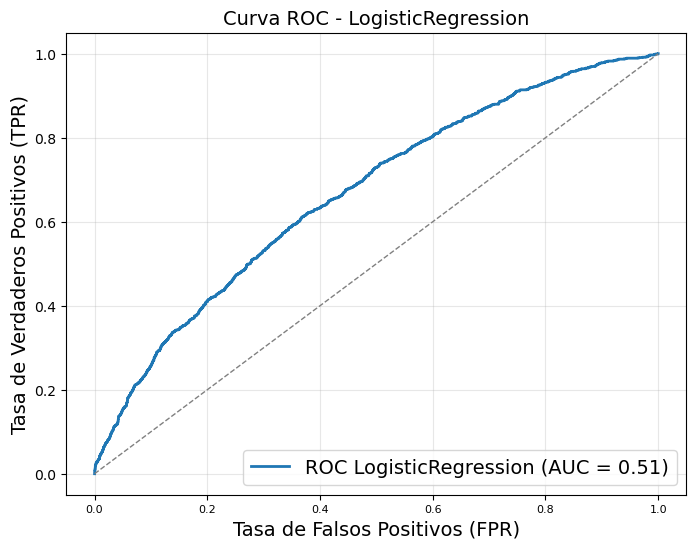

Área bajo la curva ROC: 0.51

------------------
SGDClassifier
exactitud: 0.8385947672276133
precision: 1.0
sensibilidad: 0.0
f1: 0.0
El modelo soporta evaluación cruzada


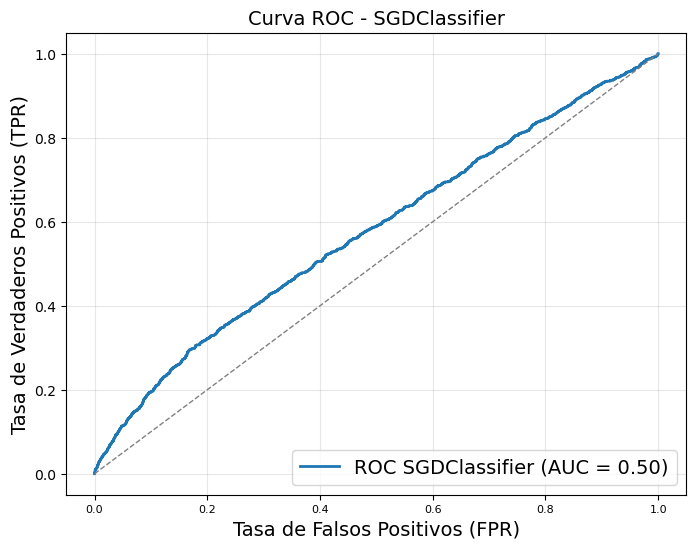

Área bajo la curva ROC: 0.50

------------------
KNeighborsClassifier
exactitud: 0.8548089915243827
precision: 0.6633663366336634
sensibilidad: 0.2039573820395738
f1: 0.3119906868451688
El modelo no soporta decision_function. Omitimos calculo roc.
------------------
RandomForestClassifier
exactitud: 1.0
precision: 1.0
sensibilidad: 1.0
f1: 1.0
El modelo no soporta decision_function. Omitimos calculo roc.
------------------


In [235]:

df_loan_train_y=df_loan_train['not.fully.paid'].copy()
df_loan_train_x=df_loan_train.drop('not.fully.paid',axis=1)

modelo_LR=make_pipeline(transformar,LogisticRegression(random_state=17,max_iter=1000))
modelo_SDG=make_pipeline(transformar,SGDClassifier(random_state=17))
modelo_KNN=make_pipeline(transformar,KNeighborsClassifier())
modelo_RF=make_pipeline(transformar,RandomForestClassifier(random_state=17))

modelos=[modelo_LR,modelo_SDG,modelo_KNN,modelo_RF]

for modelo in modelos:
    modelo.fit(df_loan_train_x,df_loan_train_y)
    predicciones = modelo.predict(df_loan_train_x)
    exactitud=accuracy_score(df_loan_train_y,predicciones)
    precision=precision_score(df_loan_train_y,predicciones,zero_division=1)
    sensibilidad=recall_score(df_loan_train_y,predicciones,zero_division=1)
    f1=f1_score(df_loan_train_y,predicciones,zero_division=1)
    roc_auc=roc_auc_score(df_loan_train_y,predicciones)

    

    print(modelo.steps[-1][1].__class__.__name__)
    print("exactitud:",exactitud)
    print("precision:",precision)
    print("sensibilidad:",sensibilidad)
    print("f1:",f1)
    
    try:
        modelo_crossval = cross_val_predict(modelo, df_loan_train_x, df_loan_train_y, cv=3, method='decision_function')
        print("El modelo soporta evaluación cruzada")
        fpr, tpr, thresholds = roc_curve(df_loan_train_y, modelo_crossval)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC {modelo.steps[-1][1].__class__.__name__} (AUC = {roc_auc:.2f})', lw=2)
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Línea de referencia
        plt.xlabel('Tasa de Falsos Positivos (FPR)')
        plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
        plt.title(f'Curva ROC - {modelo.steps[-1][1].__class__.__name__}')
        plt.legend(loc='lower right')
        plt.grid(alpha=0.3)
        plt.show()

        print(f'Área bajo la curva ROC: {roc_auc:.2f}')
        print("")

    except:
        print("El modelo no soporta decision_function. Omitimos calculo roc.")
    print("------------------")




In [ ]:
"""
A vista de estos resultados el modelo RandomForest parece ser el mejor (Perfecto aparentemente),
nos vamos con el LogisticRegresion que este si es posible optimizarlo
"""

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

In [242]:
full_pieline=Pipeline([
    ('preprocessing',transformar),
    ('classifier',LogisticRegression())
])
param_dist = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],            # Inverso de la fuerza de regularización
    'classifier__solver': ['lbfgs', 'saga', 'liblinear'],       # Algoritmos de optimización
    'classifier__max_iter': [5000],                             # Número máximo de iteraciones
    'classifier__random_state': [17]                            # Fijar la semilla para reproducibilidad
}

# Configurar la búsqueda aleatoria
grid_search = GridSearchCV(
    estimator=full_pieline,
    param_grid=param_dist,
    scoring="accuracy",  # Métrica de evaluación
    cv=5,  # Validación cruzada con 5 folds
    verbose=1,  # Mostrar progreso
    n_jobs=-1  # Usar todos los núcleos disponibles 
)

# Realizar la búsqueda aleatoria en el conjunto de entrenamiento
grid_search.fit(df_loan_train_x, df_loan_train_y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros GridSearch:", grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros GridSearch: {'classifier__C': 0.1, 'classifier__max_iter': 5000, 'classifier__random_state': 17, 'classifier__solver': 'liblinear'}


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el conjunto de pruebas con diferentes métricas

### PRESENTACIÓN DE LA SOLUCIÓN

Guarda mejor modelo (pipeline de preparación de los datos + modelo) y  haz un script de python que te pida los datos necesarios ('int_rate', 'installment', 'fico',  'revol_bal', 'revol_util', 'inq_last_6mths', 'pub_rec' y 'purpose') y prediga la solución.

## EJERCICIO 2

Vamos a trabajar conun conjunto de datos digits.

Crea un clasificador que nos diga de que número se trata.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [ ]:
# Cargar el conjunto de datos
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

#### EXPLORAR LOS DATOS

#### DIVIDIR LOS DATOS

#### PREPARAR LOS DATOS

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos, evalua los resultados en el conjunto de entrenamiento (exactitud) y calcula la matriz de confusión:
- Regresión logistica
- Maquinas de vectores de sorpote
- Random forest

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

### PRESENTACIÓN DE LA SOLUCIÓN

Simplemente guarda el modelo

## EJERCICIO 3

Vamos a trabajar con un conjunto de datos donde cada instancia (en este caso, cada película) pueda tener múltiples etiquetas (géneros en este caso).

Tienes los datos en el fichero tmdb_5000_movies.csv

Crea un clasificador que te diga los generos que le corresponden a cada película.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [ ]:
# Cargar los datos
data = pd.read_csv("Datos/tmdb_5000_movies.csv")

# Preprocesamiento de datos
# Transformar géneros en listas de palabras separadas
data["genres"] = data["genres"].apply(lambda x: [genre["name"] for genre in eval(x)])

# Dividir los datos en características (X) y etiquetas (y)
X = data["overview"]
y = data["genres"]

#### EXPLORAR LOS DATOS

#### DIVIDIR LOS DATOS

#### PREPARAR LOS DATOS

Tienes aquí las transformaciones que hay que hacer a los datos pero busca en internet que estamos haciendo exactamente y explicalo (igual hay que hacer algo con los datos que faltan)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

mlb = MultiLabelBinarizer()
y_train_transformed = mlb.fit_transform(y_train)


In [ ]:
y_test_transformed = mlb.transform(y_test)

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea un modelo Random Forest y evalúa el modelo en el conjunto de entrenamiento (accuracy), no hace falta usar validación cruzada.

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el modelo en el conjuno de prueba y muestra las primeras 25 predicciones y sus correspondientes valores reales (con texto, para lo cual tendras que aplicar mlb.inverse_transform a las predicciones).

¿Qué puedes deducir del resultado?